In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

600

In [6]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [7]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | victoria
Processing Record 2 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 3 of Set 1 | jamestown
Processing Record 4 of Set 1 | arraial do cabo
Processing Record 5 of Set 1 | hilo
Processing Record 6 of Set 1 | los llanos de aridane
Processing Record 7 of Set 1 | klaksvik
Processing Record 8 of Set 1 | hasaki
Processing Record 9 of Set 1 | keetmanshoop
Processing Record 10 of Set 1 | vaini
Processing Record 11 of Set 1 | bengkulu
Processing Record 12 of Set 1 | busselton
Processing Record 13 of Set 1 | halifax
Processing Record 14 of Set 1 | atuona
Processing Record 15 of Set 1 | touros
Processing Record 16 of Set 1 | tual
Processing Record 17 of Set 1 | baie-comeau
Processing Record 18 of Set 1 | beringovskiy
Processing Record 19 of Set 1 | kapaa
Processing Record 20 of Set 1 | kastamonu
Processing Record 21 of Set 1 | ancud
Processing Record 22 of Set 1 | punta arenas


Processing Record 38 of Set 4 | grindavik
Processing Record 39 of Set 4 | tucupita
Processing Record 40 of Set 4 | abu dhabi
Processing Record 41 of Set 4 | dikson
Processing Record 42 of Set 4 | lebu
Processing Record 43 of Set 4 | mayumba
Processing Record 44 of Set 4 | dalby
Processing Record 45 of Set 4 | port hueneme
Processing Record 46 of Set 4 | tucurui
Processing Record 47 of Set 4 | thompson
Processing Record 48 of Set 4 | tarauaca
Processing Record 49 of Set 4 | general roca
Processing Record 50 of Set 4 | bonoua
Processing Record 1 of Set 5 | kamenka
Processing Record 2 of Set 5 | pevek
Processing Record 3 of Set 5 | severnyy-kospashskiy
Processing Record 4 of Set 5 | waddan
Processing Record 5 of Set 5 | terrace bay
Processing Record 6 of Set 5 | shelburne
Processing Record 7 of Set 5 | leningradskiy
Processing Record 8 of Set 5 | erdenet
Processing Record 9 of Set 5 | andenes
Processing Record 10 of Set 5 | yar-sale
Processing Record 11 of Set 5 | puerto ayora
Processing 

Processing Record 29 of Set 8 | moindou
Processing Record 30 of Set 8 | tura
Processing Record 31 of Set 8 | vostok
Processing Record 32 of Set 8 | ottumwa
Processing Record 33 of Set 8 | malanje
Processing Record 34 of Set 8 | high rock
Processing Record 35 of Set 8 | tawnat
City not found. Skipping...
Processing Record 36 of Set 8 | dingle
Processing Record 37 of Set 8 | novobelokatay
Processing Record 38 of Set 8 | sosua
Processing Record 39 of Set 8 | kytlym
City not found. Skipping...
Processing Record 40 of Set 8 | mangrol
Processing Record 41 of Set 8 | copiapo
Processing Record 42 of Set 8 | mrirt
City not found. Skipping...
Processing Record 43 of Set 8 | trinidad
Processing Record 44 of Set 8 | kavieng
Processing Record 45 of Set 8 | cockburn town
Processing Record 46 of Set 8 | halalo
City not found. Skipping...
Processing Record 47 of Set 8 | hofn
Processing Record 48 of Set 8 | vagur
Processing Record 49 of Set 8 | jardim
Processing Record 50 of Set 8 | toora-khem
Processi

Processing Record 15 of Set 12 | itarema
Processing Record 16 of Set 12 | lerwick
Processing Record 17 of Set 12 | maragheh
Processing Record 18 of Set 12 | danane
Processing Record 19 of Set 12 | chicama
Processing Record 20 of Set 12 | tirumullaivasal
Processing Record 21 of Set 12 | kachug
Processing Record 22 of Set 12 | shahr-e babak
Processing Record 23 of Set 12 | richards bay
Processing Record 24 of Set 12 | lavumisa
Processing Record 25 of Set 12 | port hawkesbury
Processing Record 26 of Set 12 | bagdarin
Processing Record 27 of Set 12 | shahpura
Processing Record 28 of Set 12 | asayita
City not found. Skipping...
Processing Record 29 of Set 12 | lamu
Processing Record 30 of Set 12 | beverley
Processing Record 31 of Set 12 | rantauprapat
Processing Record 32 of Set 12 | maniitsoq
Processing Record 33 of Set 12 | port keats
Processing Record 34 of Set 12 | benghazi
Processing Record 35 of Set 12 | carauari
Processing Record 36 of Set 12 | meyungs
City not found. Skipping...
Pro

In [8]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Victoria,22.2855,114.1577,60.24,82,96,1.01,HK,2022-01-29 21:45:46
1,Jamestown,42.0970,-79.2353,15.12,35,0,11.50,US,2022-01-29 21:46:52
2,Arraial Do Cabo,-22.9661,-42.0278,75.16,83,75,9.22,BR,2022-01-29 21:50:28
3,Hilo,19.7297,-155.0900,78.53,56,20,8.05,US,2022-01-29 21:47:23
4,Los Llanos De Aridane,28.6585,-17.9182,58.75,73,75,7.00,ES,2022-01-29 21:50:29
5,Klaksvik,62.2266,-6.5890,34.72,64,49,24.23,FO,2022-01-29 21:50:29
6,Hasaki,35.7333,140.8333,28.80,57,74,20.11,JP,2022-01-29 21:50:30
7,Keetmanshoop,-26.5833,18.1333,81.52,44,96,3.44,NA,2022-01-29 21:50:30
8,Vaini,-21.2000,-175.2000,81.48,78,100,15.75,TO,2022-01-29 21:50:30
9,Bengkulu,-3.8004,102.2655,75.76,91,100,4.03,ID,2022-01-29 21:50:31


In [16]:
len(city_data)

549

In [23]:
new_column_order = ["City","Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Victoria,HK,2022-01-29 21:45:46,22.2855,114.1577,60.24,82,96,1.01
1,Jamestown,US,2022-01-29 21:46:52,42.0970,-79.2353,15.12,35,0,11.50
2,Arraial Do Cabo,BR,2022-01-29 21:50:28,-22.9661,-42.0278,75.16,83,75,9.22
3,Hilo,US,2022-01-29 21:47:23,19.7297,-155.0900,78.53,56,20,8.05
4,Los Llanos De Aridane,ES,2022-01-29 21:50:29,28.6585,-17.9182,58.75,73,75,7.00
5,Klaksvik,FO,2022-01-29 21:50:29,62.2266,-6.5890,34.72,64,49,24.23
6,Hasaki,JP,2022-01-29 21:50:30,35.7333,140.8333,28.80,57,74,20.11
7,Keetmanshoop,NA,2022-01-29 21:50:30,-26.5833,18.1333,81.52,44,96,3.44
8,Vaini,TO,2022-01-29 21:50:30,-21.2000,-175.2000,81.48,78,100,15.75
9,Bengkulu,ID,2022-01-29 21:50:31,-3.8004,102.2655,75.76,91,100,4.03


In [25]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [26]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

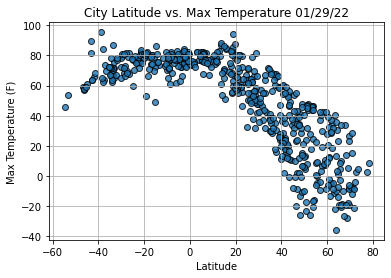

In [27]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

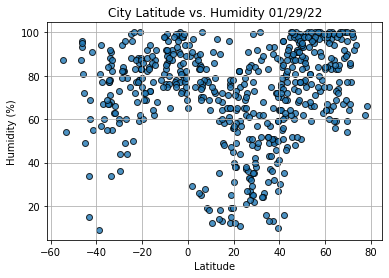

In [28]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

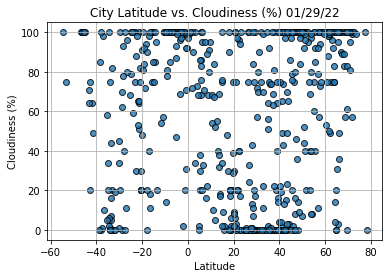

In [29]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

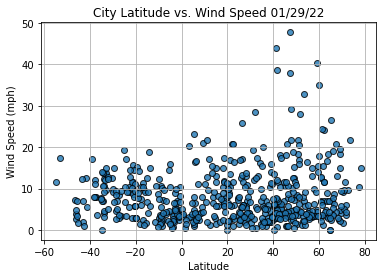

In [30]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [31]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [33]:
index13 = city_data_df.loc[13]
index13

City                       Touros
Country                        BR
Date          2022-01-29 21:50:33
Lat                       -5.1989
Lng                      -35.4608
Max Temp                     79.7
Humidity                       78
Cloudiness                     87
Wind Speed                  10.45
Name: 13, dtype: object

In [34]:
city_data_df["Lat"] >= 0

0       True
1       True
2      False
3       True
4       True
       ...  
544     True
545     True
546     True
547     True
548    False
Name: Lat, Length: 549, dtype: bool

In [35]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Victoria,HK,2022-01-29 21:45:46,22.2855,114.1577,60.24,82,96,1.01
1,Jamestown,US,2022-01-29 21:46:52,42.0970,-79.2353,15.12,35,0,11.50
3,Hilo,US,2022-01-29 21:47:23,19.7297,-155.0900,78.53,56,20,8.05
4,Los Llanos De Aridane,ES,2022-01-29 21:50:29,28.6585,-17.9182,58.75,73,75,7.00
5,Klaksvik,FO,2022-01-29 21:50:29,62.2266,-6.5890,34.72,64,49,24.23


In [36]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

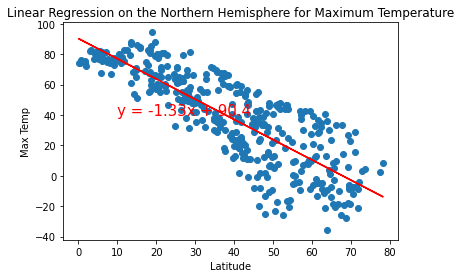

In [49]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Maximum Temperature', 'Max Temp',(10,40))

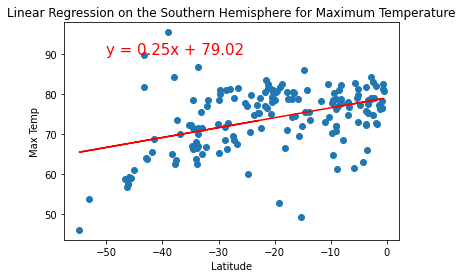

In [48]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Maximum Temperature', 'Max Temp',(-50,90))

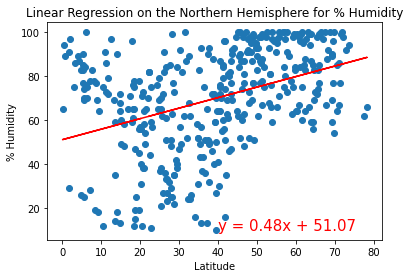

In [47]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Humidity', '% Humidity',(40,10))

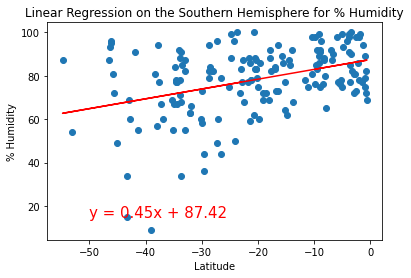

In [46]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Humidity', '% Humidity',(-50,15))

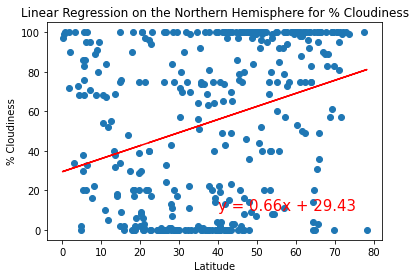

In [51]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Cloudiness', '% Cloudiness',(40,10))

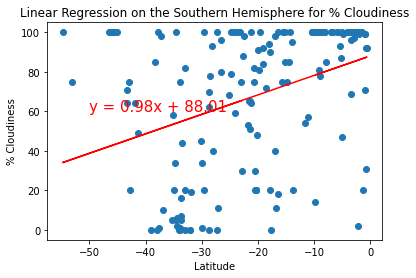

In [52]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Cloudiness', '% Cloudiness',(-50,60))

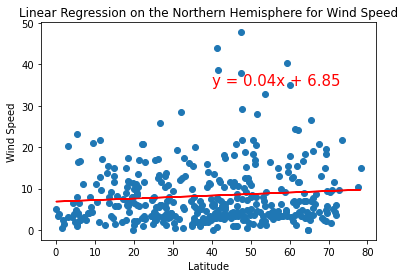

In [53]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Wind Speed', 'Wind Speed',(40,35))

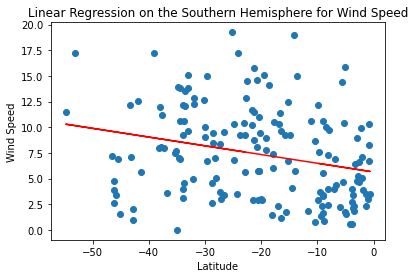

In [58]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Wind Speed', 'Wind Speed',(-50,35))